## AutoGluon-EmissionsHighGranularity Metrics Classification 


### Data Definition

-  year: The year of the data point
-  parent_entity: The entity to whom the emissions are traced to
-  parent_type: The type of parent_entity. Can be one of: investor-owned company, state-owned entity, nation state.
-  commodity:Specifies which commodity the production refers to: Oil and NGL, Natural Gas, Anthracite Coal, Bituminous Coal, Lignite Coal, Metallurgical Coal, Sub-Bituminous Coal, Thermal Coal, or Cement.
-  production_value: The quantity of production
-  production_unit: The unit of production (Oil & NGL - million barrels, Natural Gas - billion cubic feet, Coal - million tonnes, Cement - million tonnes CO2 (see methodology for explanation)). Units - Billion cubic feet per year (Bcf/yr), Million barrels per year (Million bbl/yr), or Million tonnes per year (Million tonnes/yr).
-  total_emissions_MtCO2e: The total emissions traced to the 'parent_entity' in the 'year'. Units - million tonnes of carbon dioxide equivalent (MtCO2e).
-  emissions_category:	A qualitative label for emissions intensity, such as "High" or "Low".


## Model Objectives:
- Dataset (emissions_high_granularity)
- Using AutoGluon frameworks in this context to predict whether the emissions level (i.e., total_emissions_MtCO2e) for a given observation falls into the "High" or "Low" category.
- To classify the emissions level based on standard.


## Import necessary libraries

In [1]:
# imports
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.model_selection import train_test_split

## Load the Dataset

In [2]:
data=pd.read_csv('emissions_high_granularity.csv')
data.head()


,year,parent_entity,parent_type,reporting_entity,commodity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,emissions_category
0,1854,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,50.9000,Million tonnes/yr,92.3401,0.0,0.0,0.0,10.4316,0.3726,10.4316,102.7717,High
1,1855,Adaro Energy,Investor-owned Company,Adaro Energy,Metallurgical Coal,0.9000,Million tonnes/yr,2.3989,0.0,0.0,0.0,0.2710,0.0097,0.2710,2.6700,Low
2,1856,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,48.2300,Million tonnes/yr,87.4963,0.0,0.0,0.0,9.8844,0.3530,9.8844,97.3807,High
3,1857,Adaro Energy,Investor-owned Company,Adaro Energy,Metallurgical Coal,5.7700,Million tonnes/yr,15.3799,0.0,0.0,0.0,1.7375,0.0621,1.7375,17.1174,Low
4,1858,Adaro Energy,Investor-owned Company,Adaro Energy,Sub-Bituminous Coal,52.8073,Million tonnes/yr,95.8002,0.0,0.0,0.0,10.8225,0.3865,10.8225,106.6227,High


## Checking Dataset Structures/EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                169 non-null    int64  
 1   parent_entity                       169 non-null    object 
 2   parent_type                         169 non-null    object 
 3   reporting_entity                    169 non-null    object 
 4   commodity                           169 non-null    object 
 5   production_value                    169 non-null    float64
 6   production_unit                     169 non-null    object 
 7   product_emissions_MtCO2             169 non-null    float64
 8   flaring_emissions_MtCO2             169 non-null    float64
 9   venting_emissions_MtCO2             169 non-null    float64
 10  own_fuel_use_emissions_MtCO2        169 non-null    float64
 11  fugitive_methane_emissions_MtCO2e   169 non-n

In [4]:
data.columns

Index(['year', 'parent_entity', 'parent_type', 'reporting_entity', 'commodity',
       'production_value', 'production_unit', 'product_emissions_MtCO2',
       'flaring_emissions_MtCO2', 'venting_emissions_MtCO2',
       'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e',
       'fugitive_methane_emissions_MtCH4',
       'total_operational_emissions_MtCO2e', 'total_emissions_MtCO2e',
       'emissions_category'],
      dtype='object')

In [5]:
data['emissions_category'].value_counts()

emissions_category
High    95
Low     74
Name: count, dtype: int64

In [6]:
# % 
data['emissions_category'].value_counts()/data.shape[0]

emissions_category
High    0.56213
Low     0.43787
Name: count, dtype: float64

In [7]:
# check for nulls
data.isna().sum()

year                                  0
parent_entity                         0
parent_type                           0
reporting_entity                      0
commodity                             0
production_value                      0
production_unit                       0
product_emissions_MtCO2               0
flaring_emissions_MtCO2               0
venting_emissions_MtCO2               0
own_fuel_use_emissions_MtCO2          0
fugitive_methane_emissions_MtCO2e     0
fugitive_methane_emissions_MtCH4      0
total_operational_emissions_MtCO2e    0
total_emissions_MtCO2e                0
emissions_category                    0
dtype: int64

## Split the data into train and test sets

In [8]:
# Train Test Split 
# Stratified split (ensuring equal representation of 'booking_status' in train and test sets)
# The train_df will be used for cross validation and the we will treat the test_df as the unseen dataset
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, stratify=data['emissions_category'])

In [9]:
train_df['emissions_category'].value_counts()/train_df.shape[0]

emissions_category
High    0.562963
Low     0.437037
Name: count, dtype: float64

In [10]:
# test_df= unseen data
test_df['emissions_category'].value_counts()/train_df.shape[0]

emissions_category
High    0.140741
Low     0.111111
Name: count, dtype: float64

In [11]:
# Create the predictor and fit the data
predictor = TabularPredictor(label='emissions_category', path='Emissions_predictors')

In [12]:
# observe the output
predictor.fit(train_df)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
CPU Count:          4
Memory Avail:       4.04 GB / 11.89 GB (34.0%)
Disk Space Avail:   14.06 GB / 237.77 GB (5.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference speed.
	presets='good'         : Good accurac

In [13]:
# summary
predictor.fit_summary()

C:\Users\admin\anaconda3\envs\Gluon\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMLarge   1.000000    accuracy       0.000000   0.530366                0.000000           0.530366            1       True         13
1              LightGBM   1.000000    accuracy       0.000000   0.376513                0.000000           0.376513            1       True          4
2            LightGBMXT   1.000000    accuracy       0.015620   0.477915                0.015620           0.477915            1       True          3
3       NeuralNetFastAI   1.000000    accuracy       0.015621   3.048706                0.015621           3.048706            1       True         10
4              CatBoost   1.000000    accuracy       0.015627  10.188605                0.015627          10.188605            1       True          7
5   WeightedEnsemble_L2   1.0000

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestGini': 'RFModel',
  'RandomForestEntr': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesGini': 'XTModel',
  'ExtraTreesEntr': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': 0.9629629629629629,
  'KNeighborsDist': 0.9629629629629629,
  'LightGBMXT': 1.0,
  'LightGBM': 1.0,
  'RandomForestGini': 1.0,
  'RandomForestEntr': 1.0,
  'CatBoost': 1.0,
  'ExtraTreesGini': 0.9629629629629629,
  'ExtraTreesEntr': 0.9629629629629629,
  'NeuralNetFastAI': 1.0,
  'XGBoost': 0.9629629629629629,
  'NeuralNetTorch': 1.0,
  'LightGBMLarge': 1.0,
  'WeightedEnsemble_L2': 1.0},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUni

In [14]:
test_df.columns

Index(['year', 'parent_entity', 'parent_type', 'reporting_entity', 'commodity',
       'production_value', 'production_unit', 'product_emissions_MtCO2',
       'flaring_emissions_MtCO2', 'venting_emissions_MtCO2',
       'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e',
       'fugitive_methane_emissions_MtCH4',
       'total_operational_emissions_MtCO2e', 'total_emissions_MtCO2e',
       'emissions_category'],
      dtype='object')

## Prediction

In [15]:
# validate the model against unseen data
y_test = test_df['emissions_category']
test_data = test_df.drop(columns=['emissions_category'])

In [16]:
y_pred = predictor.predict(test_data)

## Evaluation

In [17]:
metrics = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

In [18]:
metrics

{'accuracy': 0.9705882352941176,
 'balanced_accuracy': 0.9666666666666667,
 'mcc': 0.941629792788369,
 'f1': 0.9655172413793104,
 'precision': 1.0,
 'recall': 0.9333333333333333}

In [19]:
# Feature Importance
importance = predictor.feature_importance(test_df)
importance

Computing feature importance via permutation shuffling for 15 features using 34 rows with 5 shuffle sets...
	6.72s	= Expected runtime (1.34s per shuffle set)
	0.58s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
venting_emissions_MtCO2,0.047059,0.016109,0.001419,5,0.080228,0.013889
total_operational_emissions_MtCO2e,0.023529,0.013153,0.008065,5,0.050612,-0.003553
parent_entity,0.017647,0.026307,0.104000,5,0.071813,-0.036519
product_emissions_MtCO2,0.017647,0.016109,0.035242,5,0.050817,-0.015523
fugitive_methane_emissions_MtCH4,0.017647,0.016109,0.035242,5,0.050817,-0.015523
total_emissions_MtCO2e,0.017647,0.016109,0.035242,5,0.050817,-0.015523
production_value,0.011765,0.016109,0.088904,5,0.044934,-0.021405
fugitive_methane_emissions_MtCO2e,0.011765,0.016109,0.088904,5,0.044934,-0.021405
flaring_emissions_MtCO2,0.005882,0.013153,0.186950,5,0.032965,-0.021201
year,0.000000,0.000000,0.500000,5,0.000000,0.000000


## Testing/ Use Case!

In [20]:
# Use Case!
# Adjust the lead times on the reservation, or another features and test!
res = {
    "venting_emissions_MtCO2" : 1,
    "total_operational_emissions_MtCO2e" : 1,
    "parent_entity" : 0,
    "product_emissions_MtCO2" : 3,
    "fugitive_methane_emissions_MtCH4" : 4,
    "total_emissions_MtCO2e" : 0,
    "production_value" : 3,
    "fugitive_methane_emissions_MtCO2e" : 190,
    "flaring_emissions_MtCO2" : 2023,
    "year" : 11,
    "parent_type" : 3,
    "reporting_entity" : "Online",
    "commodity" : 0,
    "production_unit" : 0,
    "own_fuel_use_emissions_MtCO2" : 10
  
  }

In [21]:
Emission_data = TabularDataset([res])
predictor.predict(Emission_data)

0    High
Name: emissions_category, dtype: object

## Laoding the Model 


In [22]:
path_to_model = 'Emissions_predictors'

In [23]:
predictor = TabularPredictor.load(path_to_model)

In [24]:
data=pd.read_csv('emissions_high_granularity.csv')

In [25]:
y_pred = predictor.predict(data)


In [26]:
y_true= data['emissions_category']

In [27]:
metrics = predictor.evaluate_predictions(y_true=y_true, y_pred=y_pred, auxiliary_metrics=True)
metrics

{'accuracy': 0.9822485207100592,
 'balanced_accuracy': 0.9797297297297297,
 'mcc': 0.9644108312938128,
 'f1': 0.9793103448275862,
 'precision': 1.0,
 'recall': 0.9594594594594594}

In [28]:
predictor.info()

C:\Users\admin\anaconda3\envs\Gluon\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


{'path': 'C:\\Users\\admin\\Emissions_predictors',
 'label': 'emissions_category',
 'random_state': 0,
 'version': '1.2',
 'features': ['year',
  'parent_entity',
  'parent_type',
  'reporting_entity',
  'commodity',
  'production_value',
  'production_unit',
  'product_emissions_MtCO2',
  'flaring_emissions_MtCO2',
  'venting_emissions_MtCO2',
  'own_fuel_use_emissions_MtCO2',
  'fugitive_methane_emissions_MtCO2e',
  'fugitive_methane_emissions_MtCH4',
  'total_operational_emissions_MtCO2e',
  'total_emissions_MtCO2e'],
 'feature_metadata_in': <autogluon.common.features.feature_metadata.FeatureMetadata at 0x262a5bd5b10>,
 'time_fit_preprocessing': 0.34385132789611816,
 'time_fit_training': 27.745537757873535,
 'time_fit_total': 28.089389085769653,
 'time_limit': None,
 'time_train_start': 1744745906.5882454,
 'num_rows_train': 108,
 'num_cols_train': 18,
 'num_rows_val': 27,
 'num_rows_test': None,
 'num_classes': 2,
 'problem_type': 'binary',
 'eval_metric': 'accuracy',
 'best_model'

In [29]:
mdl_name = 'LightGBMLarge'
predictor.predict(data, model= mdl_name)

0      High
1       Low
2      High
3       Low
4      High
       ... 
164    High
165    High
166    High
167    High
168    High
Name: emissions_category, Length: 169, dtype: object

## Vizualization

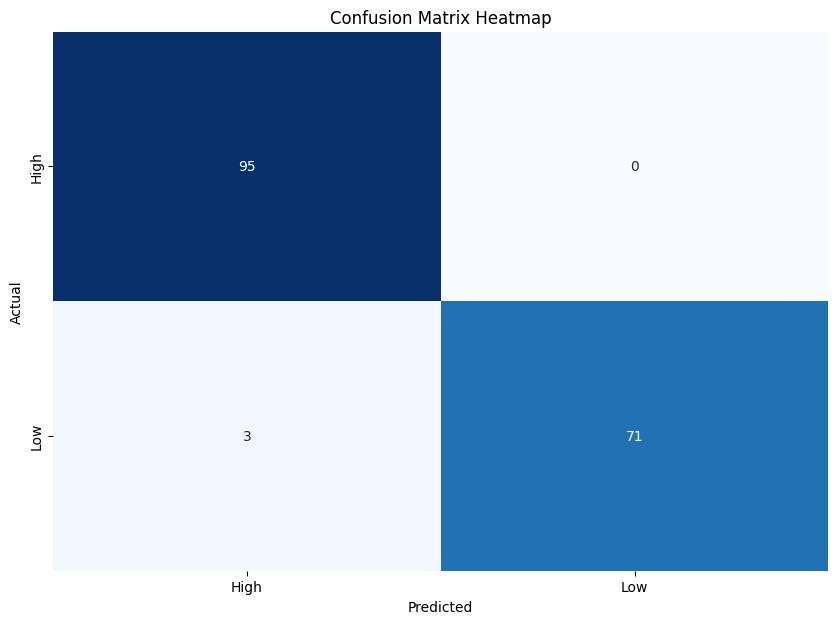

In [30]:
# Recreate class_labels and compute the confusion matrix
class_labels = ['High', 'Low']
cm = confusion_matrix(y_true, y_pred, labels=class_labels)

plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


## Conclusion/Summary


### **Model Evaluation Metrics & Conclusions**

#### **Accuracy: 0.9822**
- **Meaning**: The model correctly predicted the emissions category 98.2% of the time.
- **Conclusion**: The overall model performance is excellent in terms of correct predictions.

####  **Balanced Accuracy: 0.9705**
- **Meaning**: This metric accounts for any class imbalance by averaging the recall across classes.
- **Conclusion**: Even if "High" or "Low" emissions categories appear more frequently, the model is equally good at identifying both classes.

#### **F1 Score: 0.9655**
- **Meaning**: The harmonic mean of precision and recall; it balances false positives and false negatives.
- **Conclusion**: The model performs well even in slightly imbalanced situations, maintaining a high degree of accuracy in its classification.

#### **MCC (Matthews Correlation Coefficient): 0.9416**
- **Meaning**: A correlation metric that takes into account true/false positives and negatives.
- **Conclusion**: Very high MCC indicates strong predictive power and balanced performance across both classes, making this model robust.

#### **Precision: 1.0**
- **Meaning**: When the model predicts "High" (or the positive class), it's always correct.
- **Conclusion**: No false positives — the model is highly trustworthy when it flags a case as high emissions.

#### **Recall: 0.9333**
- **Meaning**: Of all actual "High" emissions cases, ~93.33% were correctly identified.
- **Conclusion**: Very few high-emission records were missed. The model is highly sensitive to the positive class.


### **Overall Conclusions**
1. **Exceptional performance** across all key metrics indicates a very well-fitted model.
2. **High precision** makes this model highly reliable when it flags something as "High" emissions.
3. **Strong recall** ensures that most actual "High" emissions cases are caught — crucial for environmental monitoring and regulatory compliance.
4. **Balanced and robust**: The high MCC and balanced accuracy mean the model performs well regardless of class distribution.

